<a href="https://colab.research.google.com/github/Naman09746/MUJ_HACK/blob/main/Yash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential # Import Sequential from the correct submodule
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from keras import backend as K

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Random Forest Accuracy: 0.8325123152709359
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       203
         1.0       0.82      0.86      0.84       203

    accuracy                           0.83       406
   macro avg       0.83      0.83      0.83       406
weighted avg       0.83      0.83      0.83       406

Confusion Matrix:
 [[164  39]
 [ 29 174]]
Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.2703 - loss: 1.3043 - val_accuracy: 0.4967 - val_loss: 0.8006
Epoch 2/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5543 - loss: 0.7505 - val_accuracy: 0.5132 - val_loss: 0.7048
Epoch 3/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6057 - loss: 0.6857 - val_accuracy: 0.5296 - val_loss: 0.6944
Epoch 4/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5966 - loss: 0.6783 - val_accuracy: 0.5789 - val_loss: 0.6864
Epoch 5/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6215 - loss: 0.6639 - val_accuracy: 0.5526 - val_loss: 0.6874
Epoch 6/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6187 - loss: 0.6638 - val_accuracy: 0.5263 - val_loss: 0.6931
Epoch 7/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6100 - loss: 0.6549 - val_accuracy: 0.5691 - val_loss: 0.6775
Epoch 8/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6173 - loss: 0.6530 - val_accuracy: 0.5855 - val_loss: 0.6821
Ep

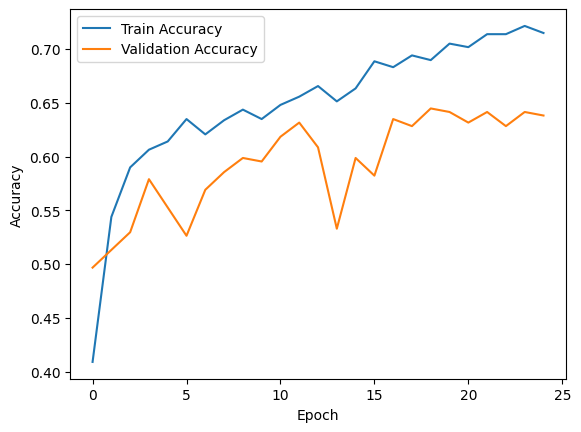

In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import matplotlib.pyplot as plt

# Load EEG dataset
df = pd.read_csv('eeg_data.csv')

# Drop unnecessary columns
df.drop(['Time'], axis=1, inplace=True)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df[['Fp1', 'Fp2', 'C3', 'C4', 'O1', 'O2']] = imputer.fit_transform(df[['Fp1', 'Fp2', 'C3', 'C4', 'O1', 'O2']])

# Encode categorical variables
encoder = OneHotEncoder(sparse=False)
encoded = encoder.fit_transform(df[['Emotion', 'Health Condition']])

# Convert encoded arrays back to DataFrame
df_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())

# Drop original categorical columns and concatenate encoded columns
df.drop(['Emotion', 'Health Condition'], axis=1, inplace=True)
df = pd.concat([df, df_encoded], axis=1)

# Scale numerical variables
scaler = StandardScaler()
df[['Fp1', 'Fp2', 'C3', 'C4', 'O1', 'O2']] = scaler.fit_transform(df[['Fp1', 'Fp2', 'C3', 'C4', 'O1', 'O2']])

# Split data into features and target
X = df.drop(df.columns[df.columns.str.startswith('Emotion')], axis=1)
y = df[df.columns[df.columns.str.startswith('Emotion')][0]]

# Handle imbalanced data with SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=12, stratify=y_res)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Reshape data for Conv1D
X_train_tf = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_tf = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define a simple CNN model for demonstration
model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train_tf.shape[1], 1)),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_tf, y_train, batch_size=32, epochs=25, validation_split=0.25)

# Evaluate TensorFlow model
loss, accuracy = model.evaluate(X_test_tf, y_test)
print("TensorFlow Model Accuracy:", accuracy)

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()